In [24]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt 

In [25]:
#Read csv to pandas
birth_data = pd.read_csv('../Data/us_births_2016_2021.csv')
birth_data.head()

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


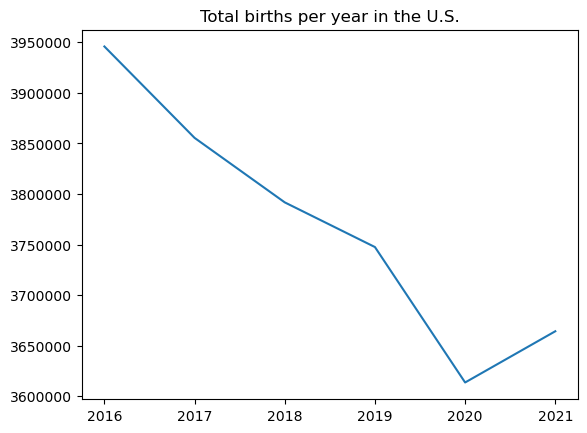

In [32]:
#Plot total births in the country from 2016 to 2021
total_births_per_year = birth_data.groupby('Year')['Number of Births'].sum()

plt.ticklabel_format(style='plain')
plt.title("Total births per year in the U.S.")
plt.plot(total_births_per_year.index, total_births_per_year)
plt.show()

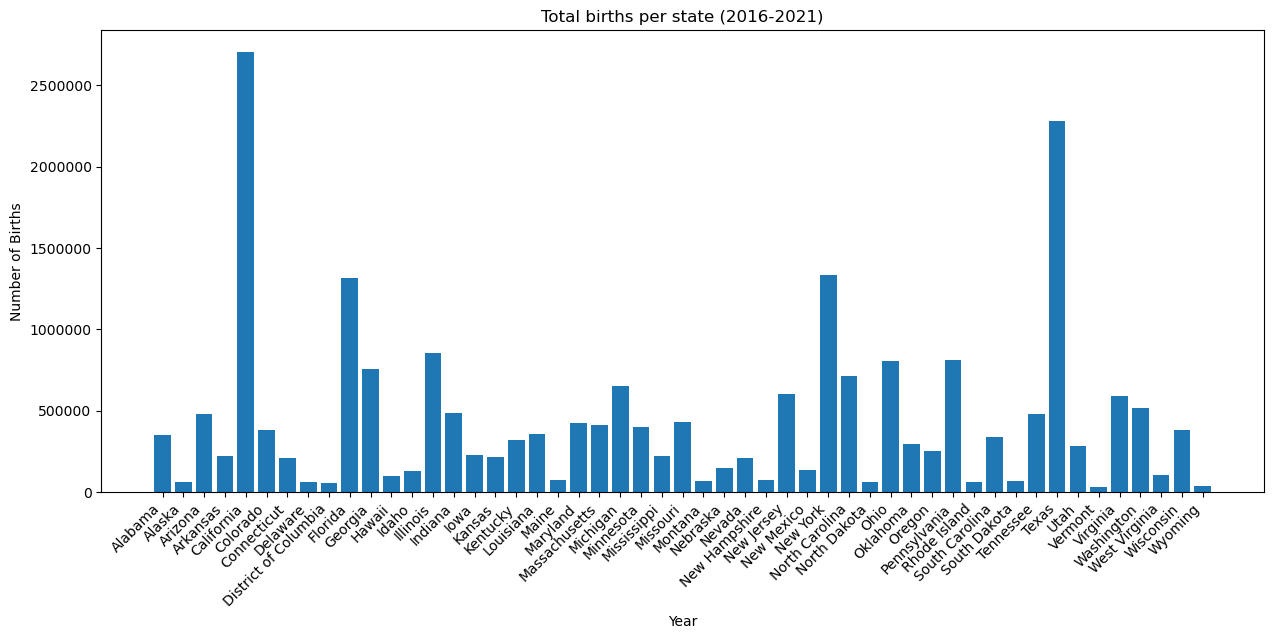

,State,Number of Births
0,Alabama,350169
1,Alaska,60398
2,Arizona,481353
3,Arkansas,220592
4,California,2702751


In [38]:
#Grouping all rows for each state together to make a new dataframe
birth_data_state = pd.DataFrame(birth_data.groupby('State')['Number of Births'].sum())
birth_data_state = birth_data_state.reset_index()
#This bar chart shows total number of births for each state from 2016 to 2021
plt.figure(figsize=(15,6))
plt.ticklabel_format(style='plain')
plt.title("Total births per state (2016-2021)")
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.xticks(rotation=45, ha='right')
plt.bar(birth_data_state['State'], birth_data_state['Number of Births'])
plt.show()
#check new dataframe
birth_data_state.head(5)

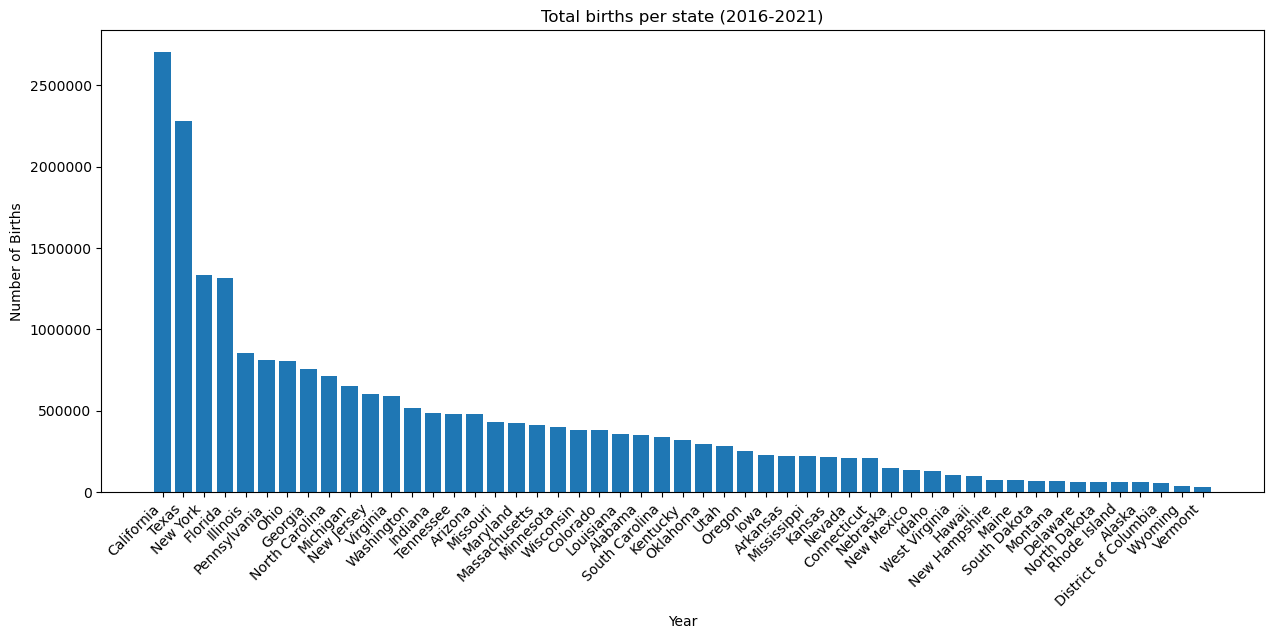

,State,Number of Births
4,California,2702751
43,Texas,2278104
32,New York,1331877
9,Florida,1316127
13,Illinois,854265


In [37]:
#This bar chart shows total number of births for each state from 2016 to 2021
#Sorted from largest to greatest instead of alphabetical order
sorted_birth_data_state =  birth_data_state.sort_values(['Number of Births'], ascending=False)
#Plot parametes
plt.figure(figsize=(15,6))
plt.ticklabel_format(style='plain')
plt.title("Total births per state (2016-2021)")
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.xticks(rotation=45, ha='right')
plt.bar(sorted_birth_data_state['State'], sorted_birth_data_state['Number of Births'])
plt.show()
#check new dataframe
sorted_birth_data_state.head()


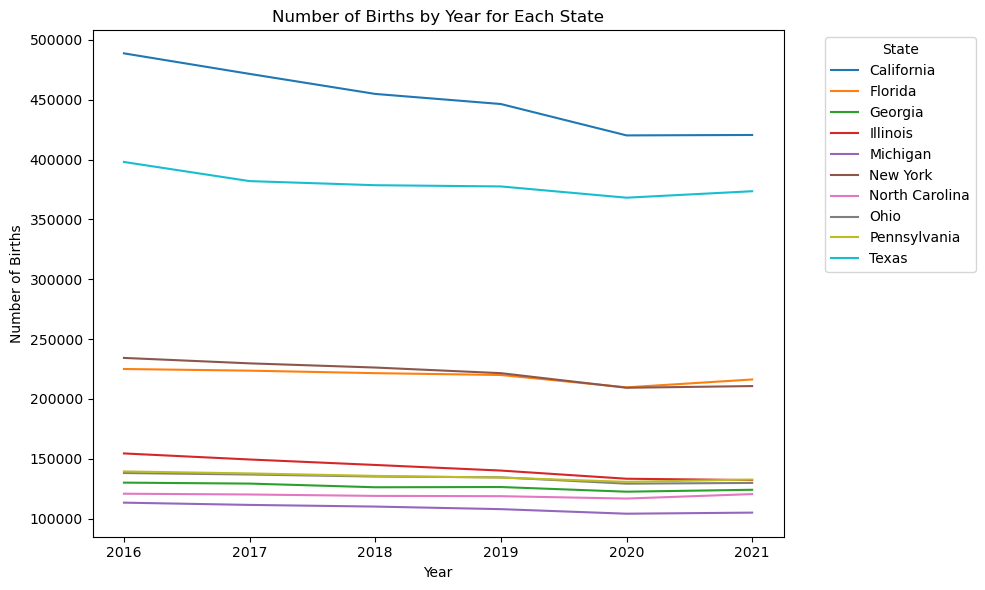

In [42]:
#Create dataframe to look at total births per year per state, only select top 10 states
birth_data_SY = pd.DataFrame(birth_data.groupby(['State','Year'])['Number of Births'].sum()).reset_index().nlargest(60, 'Number of Births')
# Pivot the dataframe 
pivot_df = birth_data_SY.pivot(index='Year', columns='State', values='Number of Births')
# Loop through each state and plot its data
plt.figure(figsize=(10, 6))
for state in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[state], label=state)
# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.title('Number of Births by Year for Each State')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
# Show the plot
plt.tight_layout()
plt.show()


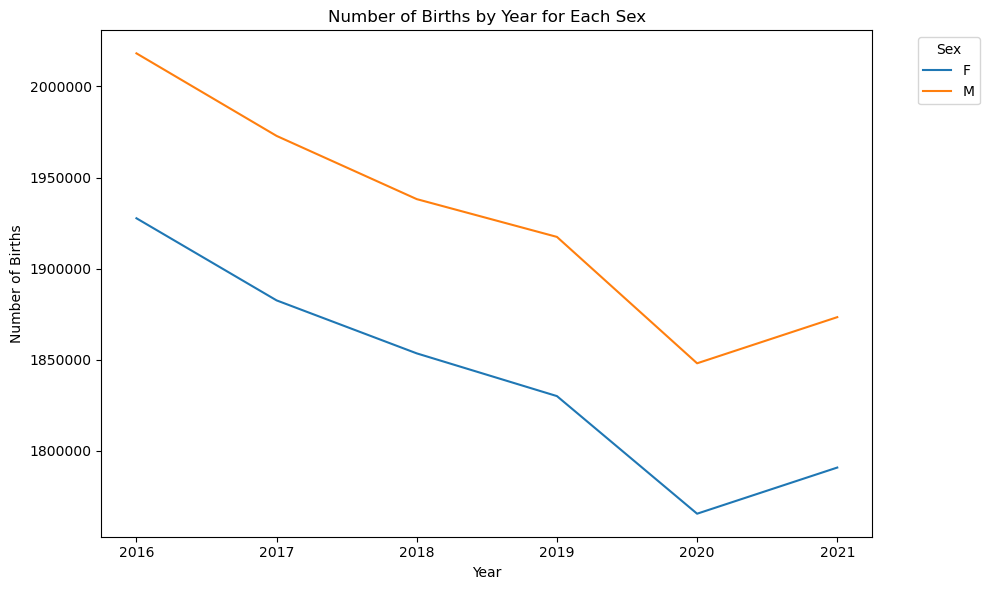

In [45]:
#Create dataframe to compare sex of newborns from 2016-2021
birth_data_YG = pd.DataFrame(birth_data.groupby(['Gender','Year'])['Number of Births'].sum()).reset_index()
# Pivot the dataframe
pivot_df = birth_data_YG.pivot(index='Year', columns='Gender', values='Number of Births')
# Loop through each sex and plot its data
plt.figure(figsize=(10, 6))
for gender in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[gender], label=gender)
# Add labels and title
plt.ticklabel_format(style='plain')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.title('Number of Births by Year for Each Sex')
plt.legend(title='Sex', bbox_to_anchor=(1.05, 1), loc='upper left')
# Show the plot
plt.tight_layout()
plt.show()


In [31]:
#Create dataframe to look at the change in number of births from each year and the total change
# Filter the DataFrame to include only data from 2018 to 2021
years = [2018,2019,2020,2021]
df_filtered = birth_data[birth_data['Year'].isin(years)]
# Pivot the table
pivot_df = df_filtered.pivot_table(index='State', columns='Year', values='Number of Births')
pivot_df['change_2018_2019'] = pivot_df[2019] - pivot_df[2018]
pivot_df['change_2019_2020'] = pivot_df[2020] - pivot_df[2019]
pivot_df['change_2020_2021'] = pivot_df[2021] - pivot_df[2020]

#Use standard deviation to measure variation in births
pivot_df['total_change_std'] = pivot_df[[2018, 2019, 2020, 2021]].std(axis=1)
# Find the state with the most change
most_change_state = pivot_df['total_change_std'].idxmax()
most_change_value = pivot_df['total_change_std'].max()

print(f"The state with the most amount of change in births from 2018 to 2021 is {most_change_state} with a standard deviation of {most_change_value}.")

pivot_df = pivot_df.sort_values(by='total_change_std', ascending=False)
pivot_df.head()


The state with the most amount of change in births from 2018 to 2021 is California with a standard deviation of 989.5112986127571.


Year,2018,2019,2020,2021,change_2018_2019,change_2019_2020,change_2020_2021,total_change_std
State,,,,,,,,
California,25273.333333,24804.388889,23347.722222,23367.111111,-468.944444,-1456.666667,19.388889,989.511299
New York,12568.777778,12307.722222,11629.888889,11707.888889,-261.055556,-677.833333,78.000000,457.905930
Illinois,8045.277778,7784.888889,7405.444444,7343.833333,-260.388889,-379.444444,-61.611111,330.595094
Florida,12307.888889,12222.333333,11648.388889,12014.444444,-85.555556,-573.944444,366.055556,293.682982
Texas,21034.666667,20977.722222,20455.000000,20755.222222,-56.944444,-522.722222,300.222222,263.030966
